# Pima Indians Diabetes Database
Predict the onset of diabetes based on diagnostic measures
### Source:- https://www.kaggle.com/uciml/pima-indians-diabetes-database

### Context:-
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## 1. Importing important libraries:~

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Loading our dataset:~

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# shape of data
df.shape

(768, 9)

In [4]:
# let see if our data have any missing value or not.
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### There is no missing values in our dataset. So, no need of Data Cleaning

## 3. Data Analysis:~

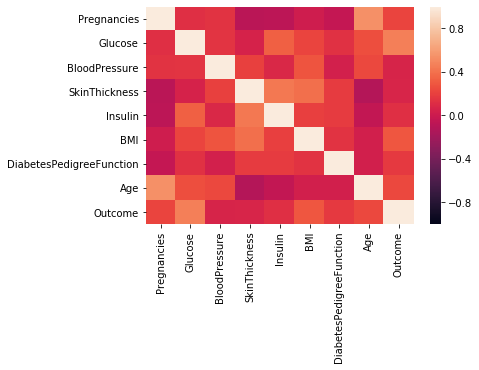

In [19]:
# Correlation Heatmap
c = df.corr()
sns.heatmap(c,vmin=-1, vmax=1)

#### From above correlation heatmap most of almost all the features are positively related to the outcome.

## 4. Model selection:~

In [20]:
X = df.drop('Outcome',1)
y = df['Outcome']

In [21]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [22]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [24]:
# used to hide the warnings.
import warnings
warnings.filterwarnings('ignore')

In [25]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [26]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm

In [29]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.7337662337662337

In [43]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.7662337662337663

In [31]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

-0.18144513826940245

In [32]:
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 
gnb.score(X_test,y_test)

0.7142857142857143

In [33]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb.score(X_test,y_test)

0.7922077922077922

In [34]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)
lasso.score(X_test,y_test)

0.1542458928442253

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)

In [46]:
# Let's train one more model using Random Forests
rf = RandomForestClassifier(n_estimators=10, random_state=42)
display_scores(-cross_val_score(rf, X, y, cv=cv, scoring="neg_mean_absolute_error"))
display_scores(np.sqrt(-cross_val_score(rf, X, y, cv=cv, scoring="neg_mean_squared_error")))

Scores: [0.25324675 0.26623377 0.2012987  0.24025974 0.22727273]
Mean: 0.23766233766233763
Standard deviation: 0.0223437019923185
Scores: [0.50323628 0.51597846 0.44866324 0.49016297 0.47673129]
Mean: 0.48695444818277644
Standard deviation: 0.02318842507255204


In [47]:
# Let's train one more model using Lasso
lasso = Lasso()
display_scores(-cross_val_score(lasso, X, y, cv=cv, scoring="neg_mean_absolute_error"))
display_scores(np.sqrt(-cross_val_score(lasso, X, y, cv=cv, scoring="neg_mean_squared_error")))

Scores: [0.38920201 0.36612471 0.35056612 0.38788545 0.37034054]
Mean: 0.3728237669407535
Standard deviation: 0.014432935051795803
Scores: [0.44708402 0.41939339 0.40370095 0.45424483 0.41841028]
Mean: 0.42856669365064803
Standard deviation: 0.01901507658924941


In [48]:
# for Gradient Boosting
display_scores(-cross_val_score(gb, X, y, cv=cv, scoring="neg_mean_absolute_error"))
display_scores(np.sqrt(-cross_val_score(gb, X, y, cv=cv, scoring="neg_mean_squared_error")))

Scores: [0.20779221 0.25974026 0.16883117 0.31168831 0.21428571]
Mean: 0.23246753246753243
Standard deviation: 0.04900769419250183
Scores: [0.45584231 0.50964719 0.4108907  0.55829053 0.46291005]
Mean: 0.4795161550416389
Standard deviation: 0.0503168910169871


### from above Gradient Boosting Classifier have good accuracy we will use it our model for prediction

# Prediction:~

In [49]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [55]:
prediction = model.predict(X_test)
prediction

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0],
      dtype=int64)

In [58]:
y_predict = pd.DataFrame(prediction, columns=['predicted_outcome'])
y_predict.head()

,predicted_outcome
0,1
1,0
2,0
3,0
4,0


#### 1 = diabetes
#### 0 = no diabetes

In [59]:
# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [63]:
results = confusion_matrix(y_test, y_predict)
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_test, y_predict) )
print('Report : ')
print( classification_report(y_test, y_predict))

Confusion Matrix :
[[85 10]
 [22 37]]
Accuracy Score : 0.7922077922077922
Report : 
              precision    recall  f1-score   support

           0       0.79      0.89      0.84        95
           1       0.79      0.63      0.70        59

    accuracy                           0.79       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154

